## STATS PROJECT

In [45]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import seaborn as sb

In [2]:
data=pd.read_csv('Stats_data.csv')

In [3]:
print(data)

    obs    x1  x2  x3  Worker's  Strike   y
0     1    60   7   7                 0  29
1     2    80  10   8                 0  15
2     3    50  14   5                 0  10
3     4    50   4   3                 0  15
4     5    75   5   6                 0  30
5     6   750  10  10                 0  45
6     7    70   5   3                 0   7
7     8    80   3   6                 0  21
8     9   300   8   8                 0  28
9    10   110   7   4                 0  30
10   11   100   8  10                 1  60
11   12   200  12  11                 1  70
12   13   500  15  12                 1  75
13   14  1200  20  12                 1  90
14   15   250   8  12                 1  62
15   16   400  14  14                 1  72
16   17   800  17  12                 1  82
17   18  2600  14  13                 1  50


## Answer 1: 
we need to compute whether there an impact of workers’ strike on construction project completion time, So for that we are applying t-statistics test to compare mean and finding p-value and comparing it with alpha. Consider alpha =0.05 Null hypothesis is difference in mean is zero Alternate hypothesis is difference in mean is not zero

In [4]:
y_strike=[data['y'][i] for i in range(len(data["Worker's  Strike"])) if data["Worker's  Strike"][i]==1]
y_nonstrike=[data['y'][i] for i in range(len(data["Worker's  Strike"])) if data["Worker's  Strike"][i]==0]

In [5]:
t2, p2 = stats.ttest_ind(y_strike,y_nonstrike)

In [6]:
print(t2,p2)

8.22057799600084 3.8896890086529434e-07


As p-value is less than alpha=0.05, hence null hypothesis is rejected and it can be concluded that there an impact of workers’ strike on construction project on completion time

## Answer 2:
We need to predict whether there is an association between various predictor variables and the time required to complete a construction project. For that we can find corelation between each independent variable and dependent variable using r-square value. 

If r-square=0 means no correlation

If -0.5 < r-square < 0.5 means weak corelation

If -1 <r-square> -0.5 means strong corelation in negative direction
    
If 0.5 < r-square < 1 means strong corelation in positive


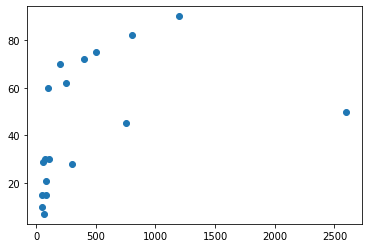

In [7]:
model_1=LinearRegression()
model_1.fit(data['x1'].values.reshape(18,1),data['y'].values.reshape(18,1))
plt.scatter(data['x1'],data['y'])

In [8]:
model_1.score(data['x1'].values.reshape(18,1),data['y'].values.reshape(18,1))

0.18021604741471098

This r-square value depict that x1 is weakly correlated with y and relation is positive

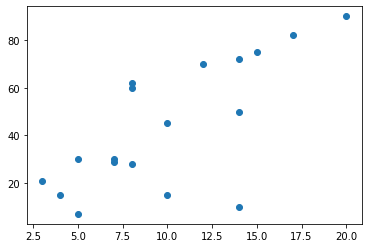

In [9]:
model_2=LinearRegression()
model_2.fit(data['x2'].values.reshape(18,1),data['y'].values.reshape(18,1))
plt.scatter(data['x2'],data['y'])

In [10]:
model_2.score(data['x2'].values.reshape(18,1),data['y'].values.reshape(18,1))

0.5191801732994851

This r-square value depict that x2 is strongle correlated with y and relation is positive

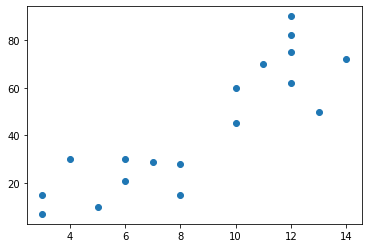

In [11]:
model_3=LinearRegression()
model_3.fit(data['x3'].values.reshape(18,1),data['y'].values.reshape(18,1))
plt.scatter(data['x3'],data['y'])

In [12]:
model_3.score(data['x3'].values.reshape(18,1),data['y'].values.reshape(18,1))

0.7573721113025976

This r-square value depict that x3 is strongle correlated with y and relation is positive

So Final conclusion is x2 and x3 are strongly correlated while x1 is weakly correlated and all correlations are positive

## Answer 3

We will fit first order model using multiple linear regression and check utility of all variables by considering null hypothesis as Coefficient of all variables =0 considering alpha=1


In [16]:
X=data[["x1","x2","x3","Worker's  Strike"]]

In [23]:
X=sm.add_constant(X)        #to add constant in the model
model= sm.OLS(data['y'],X).fit()         #fitting the model
predictions= model.summary()      #summary of the model
predictions

C:\Users\lenovo\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     21.78
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           1.15e-05
Time:                        20:14:57   Log-Likelihood:                -65.842
No. Observations:                  18   AIC:                             141.7
Df Residuals:                      13   BIC:                             146.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0657     10.197     -0.006      0.995     -22.096      21.964
x1                  -0.0062      0.005     -1.157      0.268      -0.018       0.005
x2                   1.0936      0.833      1.312      0.212      -0.707       2.894
x3                   2.6822      1.614      1.661      0.121      -0.805       6.170
Worker's  Strike    27.9443     10.284      2.717      0.018       5.726      50.162
==============================================================================
Omnibus:                        0.498   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.780   Jarque-Bera (JB):                0.577
Skew:                          -0.305   Prob(JB):                        0.749
Kurtosis:                       2.369   Cond. No.                     3.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

To check which predicor is important, we will have to see that null hypothesis which we assumed that coefficients of all variables is zero, which can be checked using p-value, if p<alpha null hypothesis is rejected. As p-value we got is 2-tailed and we need 1-tailed value so divide p-value by 2

a) For x1:
p=0.995/2=0.498>0.05, Hence predictor variable x1 is not important

b)For x2:
p=0.268/2=0.134>0.05, Hence predictor variable x2 is not important

c)For x3:
p=0.121/2=0.111>0.05, Hence predictor variable x3 is not important

d)For worker's strike:
p=0.018/2=0.009<0.05, Hence predictor variable worker's strike is important

Sign of the coefficient x1 is negative which indicate that it is negatively correlated, while in previous part, it was depicted that relation is positive.

In [35]:
y_pred=model.predict(X)
error=np.sum([(data['y']-y_pred)**2])
print(error)


1584.8895759463644


So,1584.889 variability in y is not explained by model

In terms of fraction variability not explained out of total variability is (1-r-square) i.e

1-0.830=0.170


## Answer 4

In [36]:
data['x1'] = data['x1'].apply(lambda x: np.log(x + 1))

In [37]:
print(data)

    obs        x1  x2  x3  Worker's  Strike   y
0     1  4.110874   7   7                 0  29
1     2  4.394449  10   8                 0  15
2     3  3.931826  14   5                 0  10
3     4  3.931826   4   3                 0  15
4     5  4.330733   5   6                 0  30
5     6  6.621406  10  10                 0  45
6     7  4.262680   5   3                 0   7
7     8  4.394449   3   6                 0  21
8     9  5.707110   8   8                 0  28
9    10  4.709530   7   4                 0  30
10   11  4.615121   8  10                 1  60
11   12  5.303305  12  11                 1  70
12   13  6.216606  15  12                 1  75
13   14  7.090910  20  12                 1  90
14   15  5.525453   8  12                 1  62
15   16  5.993961  14  14                 1  72
16   17  6.685861  17  12                 1  82
17   18  7.863651  14  13                 1  50


In [41]:
X_modified=data[["x1","x2","x3","Worker's  Strike"]]
X_modified=sm.add_constant(X_modified)        
model_modified= sm.OLS(data['y'],X_modified).fit()         
predictions_modified= model_modified.summary()      
predictions_modified

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     19.87
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           1.91e-05
Time:                        20:56:13   Log-Likelihood:                -66.557
No. Observations:                  18   AIC:                             143.1
Df Residuals:                      13   BIC:                             147.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.5612     14.635     -0.107      0.917     -33.179      30.057
x1                   2.0733      4.201      0.494      0.630      -7.003      11.149
x2                   0.6700      0.895      0.749      0.467      -1.264       2.604
x3                   1.6752      1.952      0.858      0.406      -2.543       5.893
Worker's  Strike    29.7635     10.884      2.735      0.017       6.250      53.278
==============================================================================
Omnibus:                        5.222   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                3.075
Skew:                          -0.979   Prob(JB):                        0.215
Kurtosis:                       3.514   Cond. No.                         88.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comparing  modified model with previous model, r-square value as well F-statistic is more in previous model, Hence previous model depict the relationship better.

In this model also only one predictor "Worker's Strike" is important.

([<matplotlib.axis.XTick at 0x23ff6adf908>,
 <a list of 19 Text xticklabel objects>)

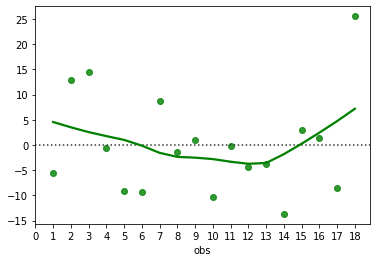

In [58]:
y_pred=model_modified.predict(X_modified)
residual=y_pred-data['y']
sb.residplot(data['obs'], residual,lowess=True, color="g")
plt.xticks(np.arange(0, 18+1, 1.0))

From the above residula plot it can be seen that observation 18 has extremely large residual,which suggest that observation 18 in the dataset was incorrect and cannot be trusted for the size of the contract as well as the time required for completion.

## Answer 5

In [62]:
# excluding 18th observation
data_new=data[:17][:]
print(data_new)

    obs        x1  x2  x3  Worker's  Strike   y
0     1  4.110874   7   7                 0  29
1     2  4.394449  10   8                 0  15
2     3  3.931826  14   5                 0  10
3     4  3.931826   4   3                 0  15
4     5  4.330733   5   6                 0  30
5     6  6.621406  10  10                 0  45
6     7  4.262680   5   3                 0   7
7     8  4.394449   3   6                 0  21
8     9  5.707110   8   8                 0  28
9    10  4.709530   7   4                 0  30
10   11  4.615121   8  10                 1  60
11   12  5.303305  12  11                 1  70
12   13  6.216606  15  12                 1  75
13   14  7.090910  20  12                 1  90
14   15  5.525453   8  12                 1  62
15   16  5.993961  14  14                 1  72
16   17  6.685861  17  12                 1  82


In [64]:
X_new=data_new[["x1","x2","x3","Worker's  Strike"]]
X_new=sm.add_constant(X_new)        
model_new= sm.OLS(data_new['y'],X_new).fit()         
predictions_new= model_new.summary()      
predictions_new

C:\Users\lenovo\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     57.25
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           1.02e-07
Time:                        22:15:22   Log-Likelihood:                -54.496
No. Observations:                  17   AIC:                             119.0
Df Residuals:                      12   BIC:                             123.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -26.4538     10.494     -2.521      0.027     -49.317      -3.590
x1                  10.2026      3.124      3.266      0.007       3.397      17.008
x2                  -0.0089      0.572     -0.016      0.988      -1.256       1.238
x3                   0.3640      1.239      0.294      0.774      -2.337       3.064
Worker's  Strike    34.8708      6.819      5.114      0.000      20.013      49.729
==============================================================================
Omnibus:                        0.165   Durbin-Watson:                   2.156
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.364
Skew:                           0.134   Prob(JB):                        0.834
Kurtosis:                       2.335   Cond. No.                         94.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above results it can be seen that after excluding 18th observation model fits better as r-square and F-statistic value both increases and also p-value for x1=0.007/2 <0.005, so it tells variable x1 is also important with worker's strike

We need to estimate the time required to complete a construction project during non-strike period when x1 = $65,000, x2 = 7 days, and x3 = 5 during non strike period

In [83]:
x1=np.log(65+1)
x2=7
x3=5
x4=0


Equation was y=10.2026*x1 -0.0089*x2 +0.3640*x3 +34.8708*(Worker's Strike)-26.4538

In [84]:
y=10.2026*x1 -0.0089*x2 +0.3640*x3 +34.8708*(x4)-26.4538
print(y)

18.049271470998804


So it will take almost 18 days to complete construction project

## Answer 6

Based on all analysis done above, we must need to know whether worker's strike is there or not to predict the construction project completion time. FInal model expression after applying log transformation for x1 and removing 18th observation final equation is

 y=10.2026x1 -0.0089x2 +0.3640x3 +34.8708(Worker's Strike)-26.4538

This equation have r-square value as 0.934 which is very high and also F-statistics value very high as 57.25 and p-value associated with it as very less as 1.02*10(-7) which signifies that this relationship is reliable